# This is a kaggle challenge 'Dogs vs. Cats Redux: Kernels Edition'

## A convolutional neural network model has been used to classify cats and dogs in images which achieves an accuracy of 81% and has a log-loss error of 0.49 on kaggle submission

The training was done on a cloud based system provided by 'Floydhub' which significantly reduced the training time

In [1]:
# Dependencies
import numpy as np
import os
from random import shuffle

# For loading bars
from tqdm import tqdm

#For plotting images
import matplotlib.pyplot as plt
%matplotlib inline

# To read images
from skimage.io import imread
from skimage.transform import resize


TRAIN_DIR = '/kaggledata/train'
TEST_DIR = '/kaggledata/test'
IMG_SIZE = 50

#learning rate
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')

In [2]:
# For one hot encoding
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat':
        return [1,0]
    else:
        return [0,1]

In [3]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        
        image = imread(path, as_grey=True)
        image = resize(image, output_shape=(IMG_SIZE, IMG_SIZE))
        
        training_data.append([np.array(image), np.array(label)])
        #To display the images
        '''
        plt.imshow(image, cmap='gray')
        plt.title("name: %s \n shape:%s" % (image.shape))
        plt.show()
        '''
    shuffle(training_data)
    np.save('training_data.npy', training_data)
    return training_data

In [4]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        
        img = imread(path, as_grey=True)
        img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [5]:
train_data = create_train_data()
print(train_data[0])

  0%|          | 0/25000 [00:00<?, ?it/s]/usr/local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 25000/25000 [03:16<00:00, 126.95it/s]


[array([[ 0.10945814,  0.05492264,  0.19062314, ...,  0.19359595,
         0.10219247,  0.14060025],
       [ 0.28451873,  0.19569062,  0.27746627, ...,  0.07729556,
         0.1211271 ,  0.14743827],
       [ 0.11948259,  0.11868312,  0.20293856, ...,  0.1220298 ,
         0.15005294,  0.17389279],
       ..., 
       [ 0.18271654,  0.37814251,  0.57172544, ...,  0.47128237,
         0.50409061,  0.44126341],
       [ 0.11839208,  0.36950746,  0.64553346, ...,  0.49733271,
         0.4659116 ,  0.29928645],
       [ 0.37482306,  0.51313357,  0.59900342, ...,  0.58365361,
         0.22351249,  0.03726396]]), array([0, 1])]


In [6]:
test_data = process_test_data()
print(test_data[0])

  0%|          | 0/12500 [00:00<?, ?it/s]/usr/local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 12500/12500 [01:39<00:00, 126.24it/s]


[array([[ 0.29530558,  0.4894906 ,  0.52515608, ...,  0.48182759,
         0.12409451,  0.69920294],
       [ 0.53084753,  0.4963152 ,  0.57046588, ...,  0.49072312,
         0.11857636,  0.58756539],
       [ 0.52228392,  0.56192667,  0.60262275, ...,  0.49873155,
         0.12620127,  0.15391138],
       ..., 
       [ 0.01035804,  0.01243647,  0.01397412, ...,  0.57368108,
         0.55264711,  0.58721878],
       [ 0.01035804,  0.01035804,  0.01397412, ...,  0.5779056 ,
         0.59402907,  0.61071995],
       [ 0.01597412,  0.01005255,  0.01397412, ...,  0.5700949 ,
         0.62047647,  0.62944275]]), '9874']


## Convolutional neural network model structure

In [8]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [14]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

import tensorflow as tf
tf.reset_default_graph()


convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [15]:
train = train_data[:-500]
test = train_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

In [16]:
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)
model.save(MODEL_NAME)

Training Step: 1148  | total loss: 0.41853 | time: 7.248s
| Adam | epoch: 003 | loss: 0.41853 - acc: 0.8189 -- iter: 24448/24500
Training Step: 1149  | total loss: 0.42149 | time: 8.267s
| Adam | epoch: 003 | loss: 0.42149 - acc: 0.8105 | val_loss: 0.49091 - val_acc: 0.7760 -- iter: 24500/24500
--
INFO:tensorflow:/output/dogsvscats-0.001-2conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


### Plotting the predicted labels for the test data

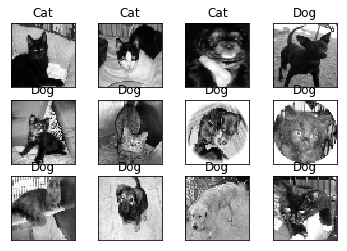

In [18]:
fig = plt.figure()
for num, data in enumerate(test_data[:12]):
    # Cat [1 0]
    # Dog [0 1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    model_out = model.predict([data])[0]
    if np.argmax(model_out) == 1:
        str_label = "Dog"
    elif np.argmax(model_out) == 0:
        str_label = "Cat"
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

plt.show()

### Converting predictions into a csv file for submission on kaggle

In [21]:
with open('submission-file.csv', 'w') as f:
    f.write('id,label\n')

In [20]:
with open('submission-file.csv', 'a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num,model_out[1]))

100%|██████████| 12500/12500 [00:30<00:00, 405.71it/s]
